**Description**:
    
    This project predicts the loan status of an applicant based on various demographic features and income details, using supervised machine learning algorithms for classification.

**Data Description :**

* **Loan_ID** - Unique Loan ID
* **Gender** - Male/Female
* **Married** - Marrital Status
* **Dependents** - no: of dependents
* **Education** - Graduate/Not Graduate
* **Self_Employed** - Yes/No
* **ApplicantIncome** - Applicant's income
* **CoapplicantIncome** - Coapplicant income
* **LoanAmount** - Loan amount in thousands
* **Loan_Amount_Term** - Term of loan in months
* **Credit_History**
                 * Applicant's credit history for past 6 months available - 1
                 * Applicant's credit history for past 6 months not available - 0
* **Property_Area**	- Urban/ Semi Urban/ Rural
* **Loan_Status** - Y/N


In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
#Reading the data

train=pd.read_csv('Dataset.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Understanding the data

In [3]:
#Column Names

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
# Checking for null values and data types of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From above we can conclude following :

* Out of 13 variables in train data, ther are 5 numeric varables and 8 are categorical variables.
* We can see presence of missing values in some variables.

### Exploratory data analysis

In [5]:
#Dropping unwanted column Loan ID

train.drop('Loan_ID',axis=1,inplace=True)

#### Looking at the target variable

In [6]:
train.Loan_Status.value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

The data seems to be balanced

### Categorical variables

In [7]:
#Converting type of 'Credit_History' and  to object
train['Credit_History']=train['Credit_History'].astype('object')
train['Loan_Amount_Term']=train['Loan_Amount_Term'].astype('object')

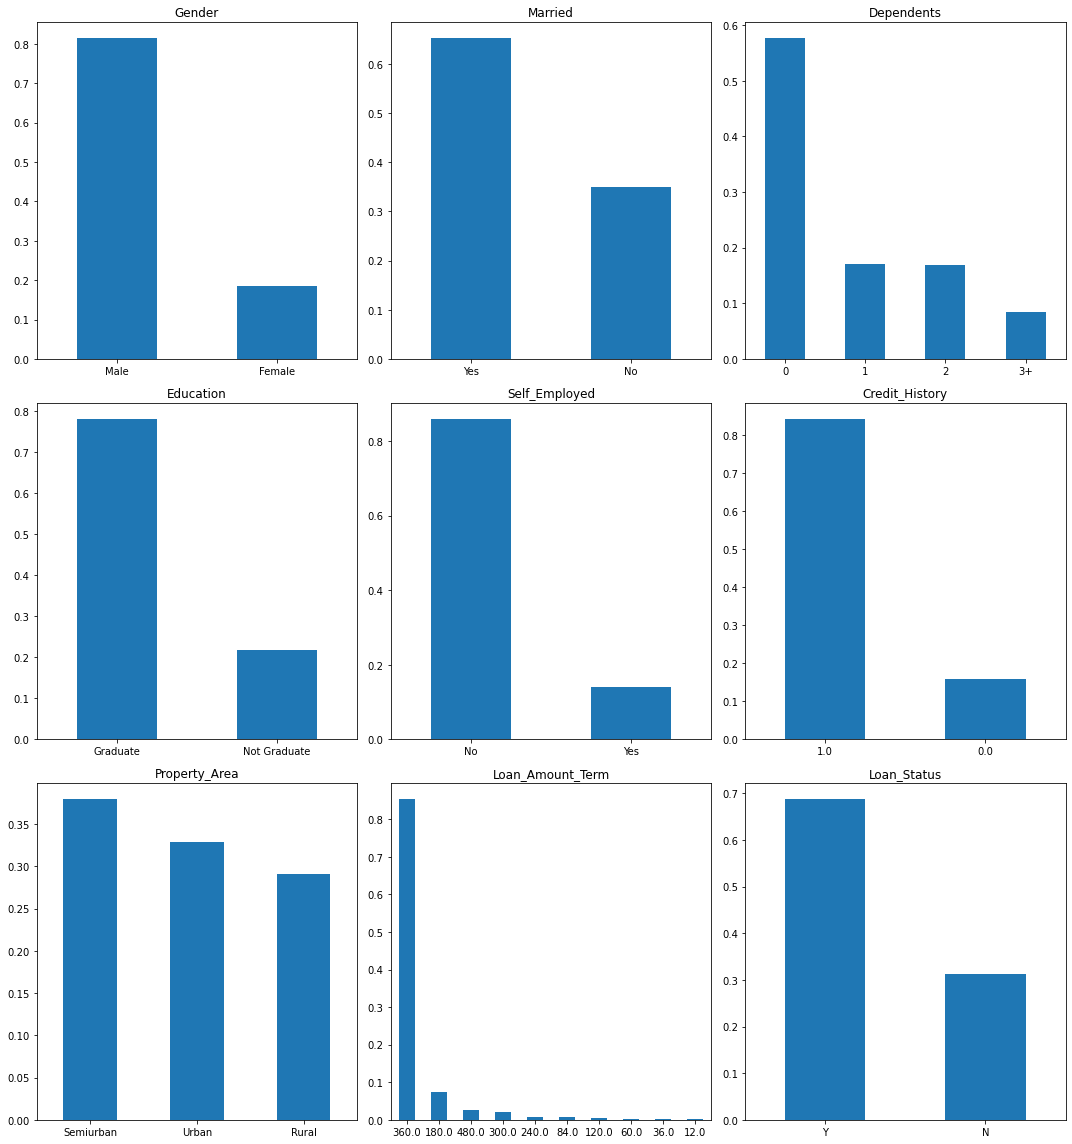

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,16), facecolor='white')
plotnumber = 1

cat_columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History','Property_Area','Loan_Amount_Term', 'Loan_Status']
for column in cat_columns:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        train[column].value_counts(normalize=True).plot.bar(title=column,rot=0)
    plotnumber+=1
plt.tight_layout()

#### Inferences :
1).Almost 80% of the applicants are males.

2).more than 60% of the applicants are married.

3).Most of the applicants are self-employed.

4).More than 80% of the applicants have loan term of 360 months.

### Numerical variables

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


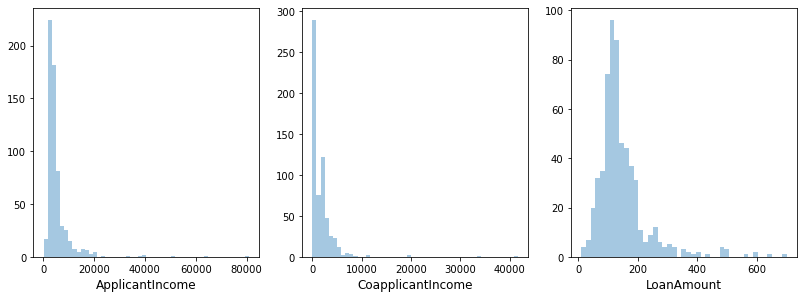

<Figure size 72x1152 with 0 Axes>

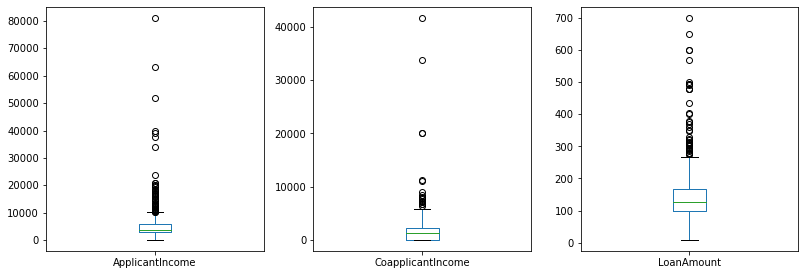

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,16), facecolor='white')
plotnumber = 1

num_columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for column in num_columns:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train[column],kde=False)
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()

# let's see how data is distributed for every column
plt.figure(figsize=(1,16), facecolor='white')
plotnumber = 1

plt.figure(figsize=(20,16), facecolor='white')
for column in num_columns:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        train[column].plot.box(figsize=(15,15))
#         plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()



#### From the plots it can be inferred that:

1). Applicant income, co-applicant income and Loan amount columns has many otliers.

### Bivariate Analysis

#### Segregating the  Applicant income by education

Text(0.5, 0.98, '')

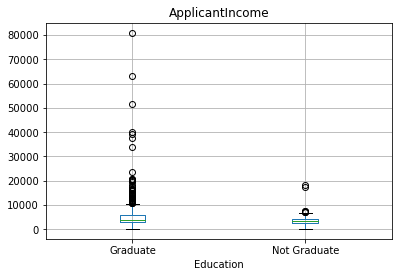

In [11]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

Obviously, Graduates have more income compared to non-graduates

### Categorical Variables vs Target Variable

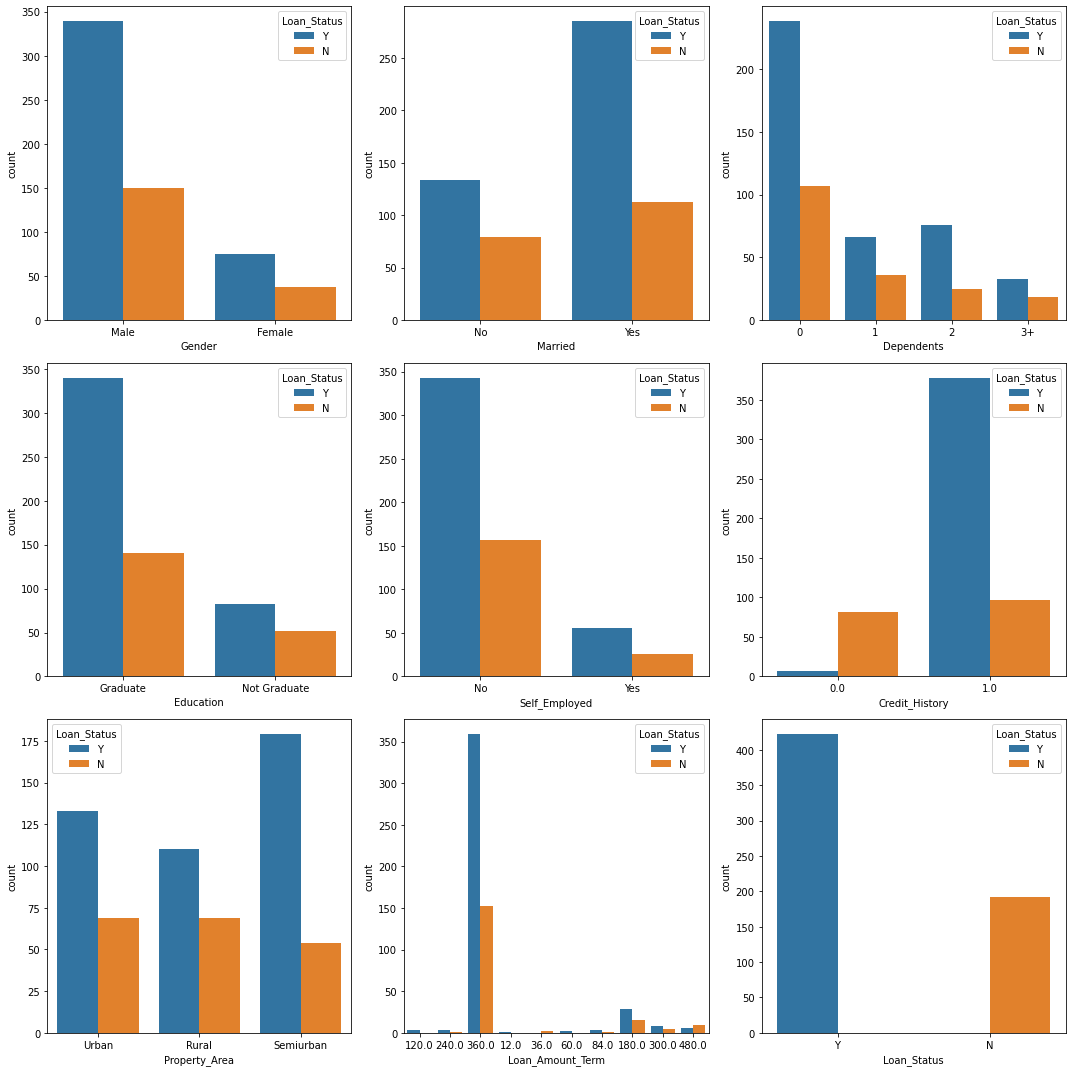

In [12]:
plotnumber = 1

plt.figure(figsize=(15,15), facecolor='white')
for column in cat_columns:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=column,data=train,hue='Loan_Status')
#         plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()


**Martial Status:**  Married applicants are more likely to be granted loans.

**Education:** Graduates have higher proportion of loan approval.

**Credit History :** As expected applicants, with credit history are more likely to be accepted.

**Loan Amount Term:** Majority of the loans taken are for 360 Months (30 years)

### Checking the correlations

<AxesSubplot:>

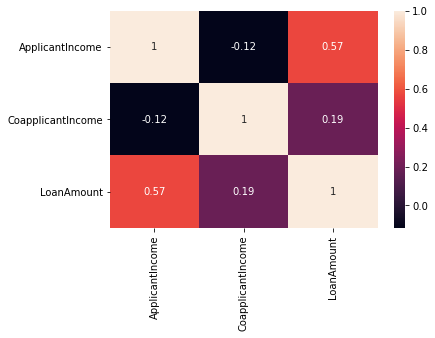

In [13]:
sns.heatmap(train.corr(),annot=True)


### Handling the missing values

In [14]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### There are missing values in many columns.

### Transformation Pipelines

In [29]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban


In [15]:
#Splitting into Independent and target variables
X = train.drop(columns='Loan_Status')
y = train['Loan_Status']

y.replace({'Y':1,'N':0},inplace=True)

train=X

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



#for numerical varibles
train_num=train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

num_pipeline=Pipeline([
                       
                       ('imputer',SimpleImputer(strategy='median')),
                       ('std_scaler',StandardScaler()),
                      
                      ])

train_num_prepared=num_pipeline.fit_transform(train_num)

#for categorical variables

train_cat=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],axis=1)
cat_pipeline=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                       ('encoder',OneHotEncoder()),
                      ])

train_cat_prepared=cat_pipeline.fit_transform(train_cat)

# x_train_prepared=np.concatenate((x_train_num_prepared,x_train_cat_prepared.toarray()),axis=1)

from sklearn.compose import ColumnTransformer

num_attribs=list(train_num)
cat_attribs=list(train_cat)

full_pipeline=ColumnTransformer([
                                 ('num',num_pipeline,num_attribs),
                                 ('cat',cat_pipeline,cat_attribs),
])

train_prepared=full_pipeline.fit_transform(train)
train_prepared_df=pd.DataFrame(train_prepared)


In [16]:
train_prepared_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.072991,-0.554487,-0.211241,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.134412,-0.038732,-0.211241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.393747,-0.554487,-0.948996,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.462062,0.251980,-0.306435,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.097728,-0.554487,-0.056551,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.889500,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
610,-0.212557,-0.554487,-1.258378,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
611,0.437174,-0.472404,1.276168,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
612,0.357064,-0.554487,0.490816,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Importing the test dataset

In [17]:
test=pd.read_csv('test.csv')
test.drop('Loan_ID',axis=1,inplace=True)

In [27]:
#Converting type of 'Credit_History' and  to object
test['Credit_History']=test['Credit_History'].astype('object')
test['Loan_Amount_Term']=test['Loan_Amount_Term'].astype('object')

In [28]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360,1,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360,1,Urban


### Transforming the test data

In [32]:
test_prepared=full_pipeline.transform(test)
test_prepared_df=pd.DataFrame(test_prepared)
test_prepared_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.186461,-0.673335,-0.426780,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.352692,-0.029848,-0.163953,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.039641,0.098849,1.183033,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.502774,0.418877,-0.591047,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.311909,-0.673335,-0.952433,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.377500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
363,-0.132056,-0.369180,-0.344647,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
364,-0.317211,0.181644,-0.163953,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
365,0.039641,0.353241,0.361700,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
